In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from vcsvgenie.read import read_vcsv
from vcsvgenie.waveform import construct_waveforms
from vcsvgenie.dc_waveform import ReadSRAMNoiseMarginResultSpecification, ReadSRAMNoiseMarginResult, \
    WriteSRAMNoiseMarginResultSpecification, WriteSRAMNoiseMarginResult

import sys
print(sys.version_info)

sys.version_info(major=3, minor=13, micro=2, releaselevel='final', serial=0)


In [2]:
READ_VCSV_PATH = Path("sram_6t_characterization.vcsv")
read_dataframe, read_titles = read_vcsv(READ_VCSV_PATH)
read_waveforms = construct_waveforms(read_dataframe, read_titles)

In [3]:
read_spec: ReadSRAMNoiseMarginResultSpecification = ReadSRAMNoiseMarginResultSpecification(signals=read_titles)
read_result: ReadSRAMNoiseMarginResult = read_spec.interpret(read_waveforms)
read_result.truncate()
read_result.reconcile()

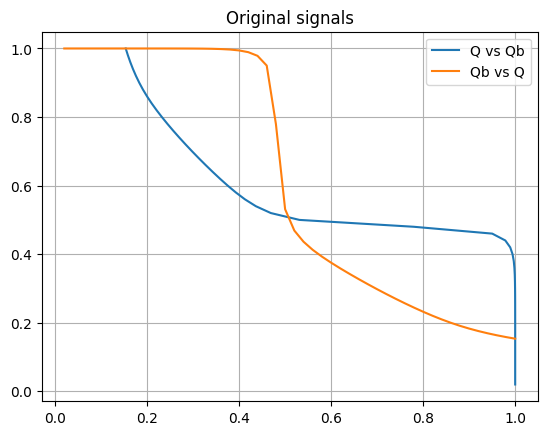

In [4]:
plt.figure()
plt.plot(
    read_result.signals[read_spec.signals[0]].x,
    read_result.signals[read_spec.signals[0]].y,
    label=read_result.signals[read_spec.signals[0]].title
)
plt.plot(
    read_result.signals[read_spec.signals[1]].x,
    read_result.signals[read_spec.signals[1]].y,
    label=read_result.signals[read_spec.signals[1]].title
)
plt.title("Original signals")
plt.legend()
plt.grid(visible=True, which='both', axis='both')
plt.show()

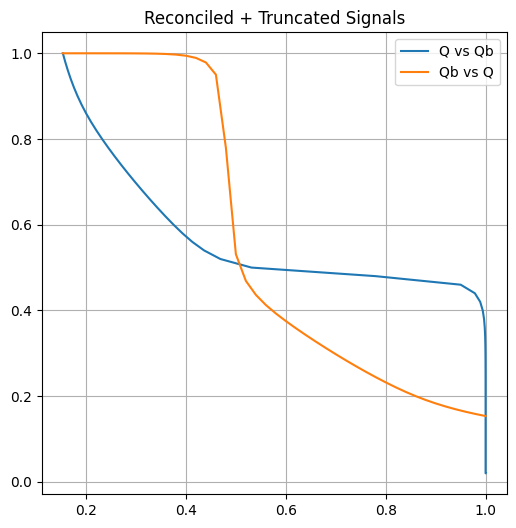

In [5]:
plt.figure(figsize=(6,6))
plt.plot(read_result.signal1.x, read_result.signal1.y, label=read_result.signal1.title)
plt.plot(read_result.signal2.x, read_result.signal2.y, label=read_result.signal2.title)
# plt.plot((0, 1), (1, 0), label='Axis')
plt.title("Reconciled + Truncated Signals")
plt.grid(visible=True, which='both', axis='both')
plt.legend()
plt.show()

Square dim = 0.19785324557586997
Anchor idx = 18
(X1, Y1) = (0.26, 0.7553477587240206)
(X2, Y2) = (0.45785324557587, 0.9532010042998906)


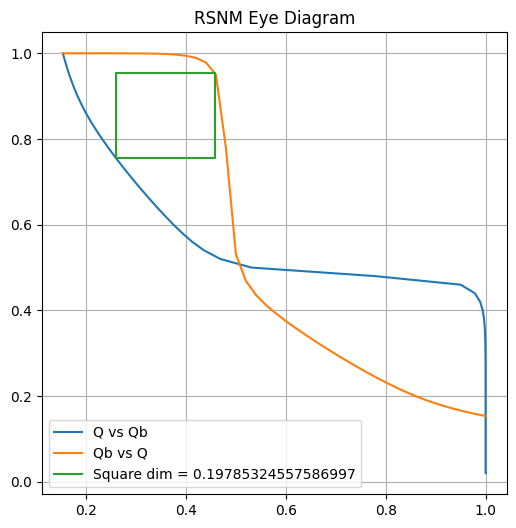

In [6]:
square_dim, anchor = read_result.calculate_square_dim()
print(f"Square dim = {square_dim}")
print(f"Anchor idx = {anchor}")
print(f"(X1, Y1) = ({read_result.signal1.x[anchor]}, {read_result.signal1.y[anchor]})")
print(f"(X2, Y2) = ({read_result.signal1.x[anchor] + square_dim}, {read_result.signal1.y[anchor] + square_dim})")
read_result.plot()

In [7]:
WRITE_VCSV_PATH = Path("WSNM.vcsv")
write_dataframe, write_titles = read_vcsv(WRITE_VCSV_PATH)
write_waveforms = construct_waveforms(write_dataframe, write_titles)

In [8]:
write_spec = WriteSRAMNoiseMarginResultSpecification(signals=write_titles)
write_result: WriteSRAMNoiseMarginResult = write_spec.interpret(write_waveforms)

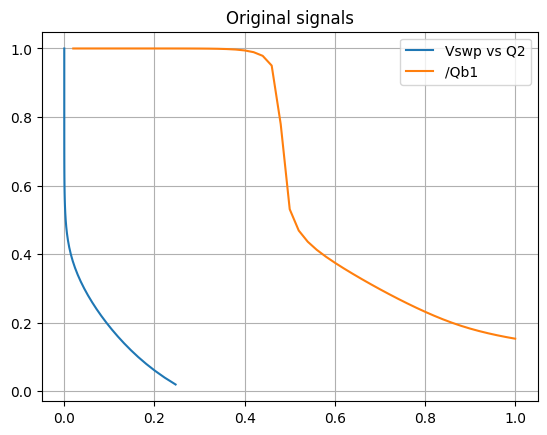

In [9]:
plt.figure()
plt.plot(
    write_result.signal1.x,
    write_result.signal1.y,
    label=write_result.signal1.title
)
plt.plot(
    write_result.signal2.x,
    write_result.signal2.y,
    label=write_result.signal2.title
)
plt.title("Original signals")
plt.legend()
plt.grid(visible=True, which='both', axis='both')
plt.show()

In [ ]:
write_result.reconcile()
plt.figure()
plt.plot(
    write_result.signal1.x,
    write_result.signal1.y,
    label=write_result.signal1.title
)
plt.plot(
    write_result.signal2.x,
    write_result.signal2.y,
    label=write_result.signal2.title
)
plt.title("Reconciled signals")
plt.legend()
plt.grid(visible=True, which='both', axis='both')
plt.show()

    0.999999901414603     0   0.1  0.999999901414603.1
0            1.000000  0.02  0.02             1.000000
1            1.000000  0.04  0.04             1.000000
2            1.000000  0.06  0.06             1.000000
3            1.000000  0.08  0.08             1.000000
4            0.999999  0.10  0.10             0.999999
5            0.999999  0.12  0.12             0.999999
6            0.999998  0.14  0.14             0.999998
7            0.999997  0.16  0.16             0.999997
8            0.999994  0.18  0.18             0.999994
9            0.999989  0.20  0.20             0.999989
10           0.999979  0.22  0.22             0.999979
11           0.999961  0.24  0.24             0.999961
12           0.999926  0.26  0.26             0.999926
13           0.999862  0.28  0.28             0.999862
14           0.999741  0.30  0.30             0.999741
15           0.999516  0.32  0.32             0.999516
16           0.999101  0.34  0.34             0.999101
17        

Square dim = 0.35425657722345405
Anchor idx = 61
(X1, Y1) = (0.0002177836266363, 0.6400000000000002)
(X2, Y2) = (0.3544743608500904, 0.9942565772234543))


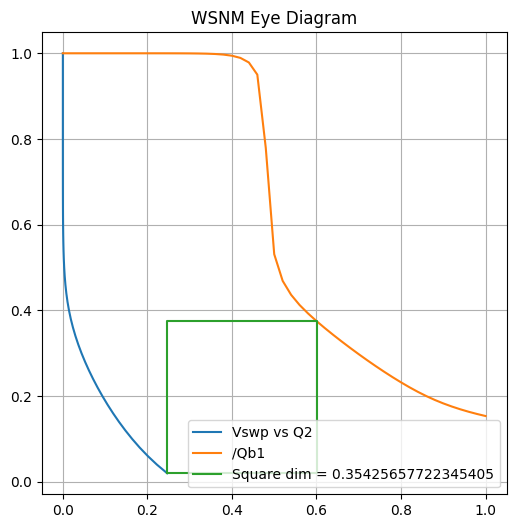

In [17]:
write_square_dim, write_anchor = write_result.calculate_square_dim()
print(f"Square dim = {write_square_dim}")
print(f"Anchor idx = {write_anchor}")
print(f"(X1, Y1) = ({write_result.signal1.x[anchor]}, {write_result.signal1.y[anchor]})")
print(f"(X2, Y2) = ({write_result.signal1.x[anchor] + write_square_dim}, {write_result.signal1.y[anchor] + write_square_dim}))")
write_result.plot()
